# Suitable Renting Places for Foreign-Born STEM Workers
    Zhining Sun
    UEP239 Geospatial Programing Final Project

## Background
STEM workers usually refer to workers in the field of natural science, math, engineering and technology. Currently, in the United States, STEM workers takes account of 6.2% of total US employment. This number is expected to increase due to the important role played by STEM workers in growing the economy and staying globally competitive. Among STEM workers, proportion of foreign-born workers keeps rising too. Comparing with native-born workers, foreign-borns workers are likely to have relatively less information but higher demand on renting. Their needs should be paid attention. This project is designed to answer the research question: what is suitable areas for foreign-born STEM workers? The tool used by this project is suitability analysis.

In [1]:
#To start with the analysis, we first have to import libraries.
import numpy as np
import pandas as pd                 
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
%matplotlib inline                 
import folium                       
import seaborn as sns   
import rasterio
from rasterio.plot import show
from rasterio import features
import geopandas as gpd
import richdem as rd
from scipy import ndimage
from rasterstats import zonal_stats
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim
from pyproj import CRS
from shapely.geometry import LineString, Point

## Work Dictionary

In [2]:
#Before we start the analysis, we need to check the work dictionary
import os
os.getcwd()

'/Users/zhiningsun/Documents/GitHub/UEP239-FinalProject'

## ZCTAs Extractions
To start with the analyis, we will extract all ZCTAs that are within the study area. We will extract boundaries, clip outline with ZCTA and then do the extraction as suggested in the Pizza. 

In [3]:
#Note that the area for this project is Boston Metropolitan Area.
#We want to read in boundaries
Boundaries = gpd.read_file('Data/MPO/MPO_Boundaries.shp')

In [4]:
Boundaries

,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((-8128884.676 5272654.345, -8128962.2..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((-7813968.781 5173329.197, -781..."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((-7977225.352 5223837.273, -7973861.8..."
3,5,Franklin,None,1970-01-01,None,1970-01-01,{4804E708-6B89-4A85-9383-BD91F7589981},1.876456e+09,2.527017e+05,"POLYGON ((-8046511.241 5269691.856, -8045276.8..."
4,6,Montachusett,None,1970-01-01,None,1970-01-01,{F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528},1.772355e+09,2.748684e+05,"POLYGON ((-7976246.504 5267152.001, -7976121.9..."
5,7,Martha's Vineyard,None,1970-01-01,None,1970-01-01,{84077DC9-D5D1-471D-9A64-1E5748F80B92},2.757449e+08,3.701721e+05,"MULTIPOLYGON (((-7859473.886 5083806.270, -785..."
6,8,Merrimack Valley,None,1970-01-01,None,1970-01-01,{C09CD5BA-4FE1-45DD-838E-19F2ECF618DB},7.188680e+08,3.847121e+05,"MULTIPOLYGON (((-7890949.271 5294156.354, -788..."
7,9,Northern Middlesex,None,1970-01-01,None,1970-01-01,{5B2D231C-F8EB-4768-AB7F-F9D02B3EDBBD},5.073539e+08,1.410283e+05,"POLYGON ((-7922038.111 5250986.670, -7923186.5..."
8,10,Nantucket,None,1970-01-01,None,1970-01-01,{633A0B7F-266B-4F07-AA30-EC320231ADAA},1.266795e+08,1.680333e+05,"MULTIPOLYGON (((-7797087.819 5069759.518, -779..."
9,11,Pioneer Valley,None,1970-01-01,None,1970-01-01,{B01F3417-DC74-4561-AE49-935ACC6EF1FF},3.054352e+09,3.206858e+05,"POLYGON ((-8049986.018 5212603.033, -8049953.4..."


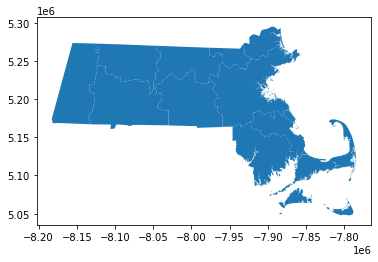

In [5]:
Boundaries.plot()
plt.show()

In [6]:
#Extract all ZCTAs that are within the study area
#Read in MA outline
Outline = gpd.read_file('Data/MA_Outlines/OUTLINE25K_POLY.shp')

In [7]:
Outline

,AREA_ACRES,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
0,4.794042e+06,1,1.940080e+10,2.457234e+06,"POLYGON ((262720.970 931706.880, 262726.090 93..."
1,6.400000e-02,2,2.589837e+02,6.441277e+01,"POLYGON ((247826.580 955016.130, 247812.530 95..."
2,1.756000e-01,3,7.104337e+02,1.160627e+02,"POLYGON ((249219.860 954550.130, 249209.020 95..."
3,4.402800e+00,4,1.781757e+04,6.075335e+02,"POLYGON ((248952.170 954025.880, 248958.480 95..."
4,6.554800e+00,5,2.652649e+04,7.402520e+02,"POLYGON ((248624.580 953915.130, 248580.140 95..."
...,...,...,...,...,...
913,1.546410e+01,909,6.258092e+04,2.040354e+03,"POLYGON ((300297.910 787312.190, 300309.660 78..."
914,9.980571e+02,910,4.038993e+06,1.612254e+04,"POLYGON ((304728.970 784910.810, 304737.380 78..."
915,1.028706e+02,912,4.163025e+05,3.924734e+03,"POLYGON ((307457.000 781867.940, 307466.560 78..."
916,6.175377e+02,914,2.499086e+06,7.740494e+03,"POLYGON ((257218.250 779297.880, 257223.020 77..."


In [8]:
#Read in ZCTAs
ZCTA = gpd.read_file('Data/ZCTA/tl_2010_25_zcta510.shp')

In [9]:
ZCTA

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((-70.07925 41.67769, -70.07864 41.677..."
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((-73.23558 42.49333, -73.23587 42.493..."
...,...,...,...,...,...,...,...,...,...,...,...,...
533,25,01537,2501537,B5,G6350,S,18085937,295745,+42.1589660,-071.8970514,N,"POLYGON ((-71.89793 42.18884, -71.89791 42.188..."
534,25,01503,2501503,B5,G6350,S,33598202,523984,+42.3849290,-071.6338895,N,"POLYGON ((-71.58830 42.38197, -71.58961 42.381..."
535,25,01452,2501452,B5,G6350,S,106373488,2406515,+42.4895983,-072.0028783,N,"POLYGON ((-72.04222 42.44499, -72.04371 42.446..."
536,25,01571,2501571,B5,G6350,S,53915863,2717076,+42.0537777,-071.9350751,N,"POLYGON ((-71.93992 42.02558, -71.94414 42.025..."


In [10]:
#We will clip Outline and ZCTA 
#Check for projection
Outline.crs == ZCTA.crs

False

In [11]:
Outline.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
ZCTA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [13]:
#Change projection
ZCTA = ZCTA.to_crs("EPSG:26986")

In [14]:
Outline.crs == ZCTA.crs

True

In [15]:
#Clip
ZCTA_Outline = gpd.clip(ZCTA,Outline)

In [16]:
# Extract ZCTA whose centroids are within study area
#Check for projection
ZCTA_Outline.crs == Boundaries.crs

False

In [17]:
Boundaries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
#Change projection
ZCTA_U=ZCTA_Outline.to_crs("EPSG:3857")

In [19]:
ZCTA_U.crs == Boundaries.crs

True

In [20]:
# Extract all the ZCTAs whose centroid is within the Boston Region MPO boundary.
zcta_boston = ZCTA_U[ZCTA_U.centroid.within(Boundaries['geometry'][10])]

In [21]:
zcta_boston

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
17,25,01905,2501905,B5,G6350,S,9219345,1195154,+42.4659985,-070.9757922,N,"MULTIPOLYGON (((-7899944.411 5232206.578, -789..."
18,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,N,"POLYGON ((-7897468.553 5233487.096, -7897513.7..."
21,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,N,"MULTIPOLYGON (((-7890462.043 5249910.060, -788..."
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((-7929552.593 5209938.258, -792..."
37,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,N,"POLYGON ((-7948367.918 5204315.595, -7948371.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
524,25,02343,2502343,B5,G6350,S,18146751,280250,+42.1489129,-071.0037371,N,"POLYGON ((-7901321.179 5183869.703, -7901334.9..."
526,25,02129,2502129,B5,G6350,S,3492181,1266666,+42.3796570,-071.0614875,N,"MULTIPOLYGON (((-7911523.459 5216922.381, -791..."
527,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,N,"MULTIPOLYGON (((-7904984.309 5220441.555, -790..."
528,25,02122,2502122,B5,G6350,S,5263269,1641767,+42.2914125,-071.0421575,N,"MULTIPOLYGON (((-7908987.507 5203148.038, -790..."


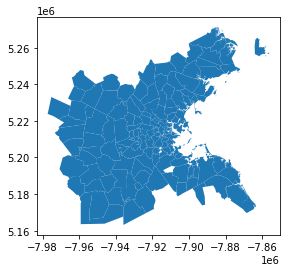

In [22]:
zcta_boston.plot()
plt.show()

## Identify Indiactors
After we have extracted ZCTAs in the study area, next step is to identify indicators. As far as I am conerned, for foreign-born STEM workers, they tend to have relatively higher salary. Comparing with other non-STEM immigrants, they tend to be more care about the basic infrastructure and environment within their neighborhoods. Hence, I pick landcover, hospitals, tree canopy and schools as initial four indicators. 
For each indicator, I will summarize the value by zipcode, map the location, create a choropleth map, rank the area based on values, reclassify and visualize the indicator after reclassification. 

I will start my analysis by landcover data to identify potential livable areas. 

In [23]:
# I will first read in the landcover data
with rasterio.open('Data/nlcd/NLCD_2016_Land_Cover_Boston.tif') as landcover:
    landcover_shape = landcover.shape
    landcover_transform = landcover.transform
    landcover_res = landcover.res
    landcover_crs = landcover.crs
    landcover_nodata = landcover.nodata
    landcover_bounds = landcover.bounds
    landcover_1 = landcover.read(1)

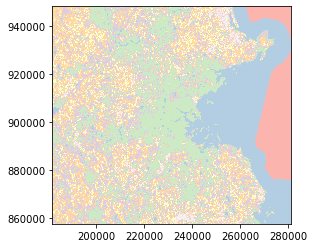

In [53]:
#Visualization
show(landcover_1, transform = landcover_transform,cmap='Pastel1' )
plt.show()

In [55]:
#Create reclassification
landcover_reclass = np.full(landcover_shape, np.NaN)

In [59]:
#Reclassify
landcover_reclass[(landcover_1 == 23)] =5
landcover_reclass[(landcover_1 == 24)] = 4
landcover_reclass[(landcover_1 == 22)] = 3
landcover_reclass[(landcover_1 ==21)] = 2
landcover_reclass[(landcover_1 !=23) & (landcover_1 != 24)& (landcover_1 != 22)& (landcover_1 != 21)] = 1

In [60]:
landcover_reclass

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

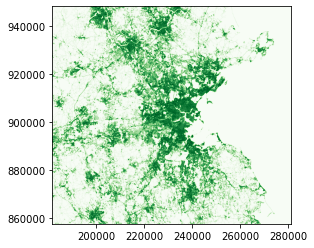

In [71]:
#Visualization after Reclassification
show(landcover_reclass,cmap='Greens',transform=landcover_transform)
plt.show()

I will start working on tree canopy as my second indicator which is an important component for the environment. 

In [72]:
with rasterio.open('Data/nlcd/NLCD_2016_Tree_Canopy_Boston.tif') as Trees:
    Trees_shape = Trees.shape
    Trees_transform = Trees.transform
    Trees_res = Trees.res
    Trees_crs = Trees.crs
    Trees_nodata = Trees.nodata
    Trees_bounds = Trees.bounds
    Trees_1 = Trees.read(1)

In [73]:
#Check if tree canopy has the same medata as landcover
with rasterio.open('Data/nlcd/NLCD_2016_Land_Cover_Boston.tif') as landcover:
    landcover_meta = landcover.meta

In [74]:
with rasterio.open('Data/nlcd/NLCD_2016_Tree_Canopy_Boston.tif') as Trees:
    Trees_meta = Trees.meta

In [75]:
Trees_meta ==landcover_meta

True

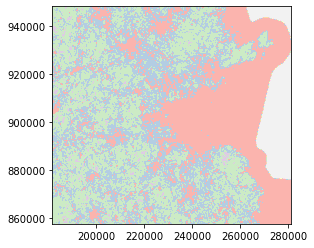

In [81]:
#Visualization
show(Trees_1, transform = Trees_transform,cmap='Pastel1')
plt.show()

In [79]:
Trees_1

array([[ 86,  88,  84, ..., 255, 255, 255],
       [ 88,  89,  89, ..., 255, 255, 255],
       [ 85,  89,  88, ..., 255, 255, 255],
       ...,
       [ 85,  84,  89, ...,   0,   0,   0],
       [ 89,  87,  87, ...,   0,   0,   0],
       [ 89,  87,  86, ...,   0,   0,   0]], dtype=uint8)

In [82]:
Trees_reclass = np.full(Trees_shape, np.NaN)

In [83]:
#Reclassify
Trees_reclass[(Trees_1 >= 60)& (Trees_1 < 70)] =5
Trees_reclass[((Trees_1 >= 50)& (Trees_1 < 60))|((Trees_1 >= 70)& (Trees_1 < 80))] =4
Trees_reclass[((Trees_1 >= 40)& (Trees_1 < 50))|((Trees_1 >= 80)& (Trees_1 < 90))] =3
Trees_reclass[((Trees_1 >= 15)& (Trees_1 < 40))|((Trees_1 >= 90)& (Trees_1 < 100))] =2
Trees_reclass[Trees_1 < 15] =1

In [ ]:
#Visualization after Reclassification
show(landcover_reclass,cmap='Greens',transform=landcover_transform)
plt.show()

In [24]:
#I will start with hospitals
#Hospitals
Hospitals = gpd.read_file('Data/hospitals/HOSPITALS_PT.shp')

In [25]:
Hospitals

,IDNUMBER,DPHID,NAME,SHORTNAME,ADDRESS,TOWN,GEOG_TOWN,ZIPCODE,CHIAREGION,TELEPHONE,...,TAXSTATUS,BEDCOUNT,ER_STATUS,TRAUMA_ADU,TRAUMA_PED,SPEPUBFUND,FYE,MADID,EMSREGION,geometry
0,2069,2069,Beth Israel Deaconess Medical Center East,BIDMC East,330 Brookline Avenue,Boston,BOSTON,02215,Metro Boston,(617) 667-7000,...,Non-profit,248,N,None,None,Not Applicable,2017-09-30,35022096,4,POINT (232494.091 898890.122)
1,2085,2085,Steward St. Elizabeth's Medical Center,St. Elizabeth's Medical Center,736 Cambridge Street,Brighton,BOSTON,02135,Metro Boston,(617) 789-3000,...,For profit,252,Y,None,None,Not Applicable,2017-12-31,35156980,4,POINT (229003.958 899958.291)
2,2299,2299,Tufts Medical Center,Tufts Medical Center,800 Washington Street,Boston,BOSTON,02111,Metro Boston,(617) 636-5000,...,Non-profit,415,Y,Level 1,Level 1,Not Applicable,2017-09-30,35145764,4,POINT (235963.109 899998.149)
3,2103,2103,UMass Memorial Marlborough Hospital,Marlborough Hospital,157 Union Street,Marlborough,MARLBOROUGH,01752,Metro West,(508) 481-5000,...,Non-profit,79,Y,None,None,CHART,2017-09-30,1613538,4,POINT (195490.775 900535.402)
4,2167,2167,Massachusetts Eye and Ear Infirmary,Massachusetts Eye and Ear Infirmary,243 Charles Street,Boston,BOSTON,02114,Metro Boston,(617) 523-7900,...,Non-profit,41,Y,None,None,Not Applicable,2017-09-30,35163139,4,POINT (235396.614 901452.905)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2007,2007,Northeast Hospital - Beverly Hospital Campus,Beverly Hospital,85 Herrick Street,Beverly,BEVERLY,01915,Northeastern Massachusetts,(978) 922-3000,...,Non-profit,223,Y,Level 3,None,CHART,2017-09-30,30603,3,POINT (251282.809 923893.413)
71,2099,2099,Lawrence General Hospital,Lawrence General Hospital,One General Street,Lawrence,LAWRENCE,01842,Northeastern Massachusetts,(978) 683-4000,...,Non-profit,189,Y,Level 3,None,"CHART, DSTI",2017-09-30,2105337,3,POINT (228733.925 939952.581)
72,2225,2225,Steward Holy Family Hospital - Methuen,Holy Family Hospital-Methuen,70 East Street,Methuen,METHUEN,01844,Northeastern Massachusetts,(978) 687-0151,...,For profit,223,Y,None,None,Not Applicable,2017-12-31,2067363,3,POINT (227158.670 941961.942)
73,2131,2131,Steward Holy Family Hospital - Haverhill,Holy Family Hospital-Haverhill,140 Lincoln Avenue,Haverhill,HAVERHILL,01830,Northeastern Massachusetts,(978) 374-2000,...,Non-profit,124,Y,None,None,None,None,2228036,3,POINT (237237.989 946159.364)


In [26]:
type(Hospitals)

geopandas.geodataframe.GeoDataFrame

In [27]:
zcta_boston.crs==Hospitals.crs

False

In [28]:
hospital=Hospitals.to_crs(zcta_boston.crs)

In [29]:
hospital.crs == zcta_boston.crs

True

In [30]:
#Join the two datasets
hospital_m =hospital.merge(zcta_boston,left_on='ZIPCODE', right_on='ZCTA5CE10')
hospital_m.head(2)

,IDNUMBER,DPHID,NAME,SHORTNAME,ADDRESS,TOWN,GEOG_TOWN,ZIPCODE,CHIAREGION,TELEPHONE,...,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry_y
0,2069,2069,Beth Israel Deaconess Medical Center East,BIDMC East,330 Brookline Avenue,Boston,BOSTON,02215,Metro Boston,(617) 667-7000,...,2502215,B5,G6350,S,1979040,280050,+42.3475927,-071.1029340,N,"POLYGON ((-7917617.107 5213795.544, -7917579.0..."
1,2335,2335,Dana-Farber Cancer Institute,Dana-Farber Cancer Institute,450 Brookline Avenue,Boston,BOSTON,02215,Metro Boston,(617) 632-3000,...,2502215,B5,G6350,S,1979040,280050,+42.3475927,-071.1029340,N,"POLYGON ((-7917617.107 5213795.544, -7917579.0..."


In [31]:
#Summary for number of hospitals per zipcode area
count_hospital = hospital_m['IDNUMBER'].groupby(hospital_m['ZIPCODE']).agg(['count','nunique'])
count_hospital

,count,nunique
ZIPCODE,,
01702,1,1
01742,1,1
01752,1,1
01757,1,1
01760,1,1
01890,1,1
01904,1,1
01915,1,1
01960,1,1


In [32]:
#Map the location of each hospital
type(hospital_m)

pandas.core.frame.DataFrame

In [33]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
hospital_g = GeoDataFrame(hospital_m, geometry=hospital_m['geometry_x']) 

<AxesSubplot:>

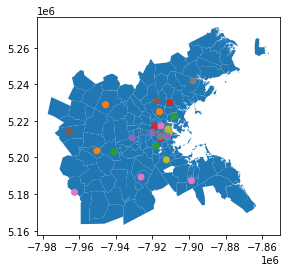

In [34]:
hospital_g.plot(column = "IDNUMBER",ax=zcta_boston.plot())

In [35]:
#choropleth map
spatial_hos = zcta_boston.merge(count_hospital,left_on='ZCTA5CE10', right_on='ZIPCODE')
spatial_hos.head(2)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,count,nunique
0,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,N,"POLYGON ((-7897468.553 5233487.096, -7897513.7...",1,1
1,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,N,"MULTIPOLYGON (((-7890462.043 5249910.060, -788...",1,1


In [36]:
zcta_boston.crs == spatial_hos.crs

True

In [37]:
#Spatial Join
hospital_join = gpd.sjoin(zcta_boston,spatial_hos, how='left', op='contains', lsuffix='left', rsuffix='right')
hospital_join.head()

,STATEFP10_left,ZCTA5CE10_left,GEOID10_left,CLASSFP10_left,MTFCC10_left,FUNCSTAT10_left,ALAND10_left,AWATER10_left,INTPTLAT10_left,INTPTLON10_left,...,CLASSFP10_right,MTFCC10_right,FUNCSTAT10_right,ALAND10_right,AWATER10_right,INTPTLAT10_right,INTPTLON10_right,PARTFLG10_right,count,nunique
17,25,01905,2501905,B5,G6350,S,9219345,1195154,+42.4659985,-070.9757922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,...,B5,G6350,S,11708211.0,1303900.0,+42.4924563,-070.9739297,N,1.0,1.0
21,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,...,B5,G6350,S,39091336.0,3958118.0,+42.5702688,-070.8669962,N,1.0,1.0
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,...,B5,G6350,S,1369318.0,69749.0,+42.3287076,-071.2559002,N,1.0,1.0
37,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,...,B5,G6350,S,38359306.0,2599042.0,+42.2848223,-071.3488109,N,1.0,1.0


In [38]:
#Replace missing values with 0
hospital_join.fillna(0, inplace=True)

<AxesSubplot:>

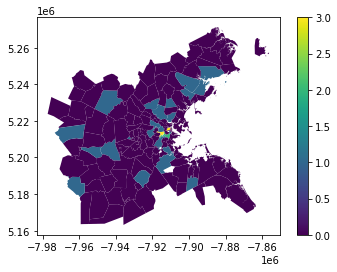

In [39]:
#Do the map
hospital_join.plot(column = 'count',legend=True)

In [40]:
spatial_count = hospital_join[['ZCTA5CE10_left','count']]

In [41]:
spatial_count_1 = spatial_count.sort_values('count',ascending=False)

In [42]:
spatial_count_1

,ZCTA5CE10_left,count
318,02114,3.0
522,02215,3.0
186,02115,2.0
53,02118,2.0
316,02124,1.0
...,...,...
230,02460,0.0
231,02451,0.0
232,01731,0.0
233,01741,0.0


In [43]:
#ZCTA with highest rank
spatial_count_highest = spatial_count_1[spatial_count_1['count']== 3.0]
spatial_count_highest

,ZCTA5CE10_left,count
318,02114,3.0
522,02215,3.0


In [44]:
#We want to replace the missing value with 0 so that we can take a look at counties without hospitals.
spatial_count_1.fillna(0, inplace=True)

In [45]:
spatial_count_1

,ZCTA5CE10_left,count
318,02114,3.0
522,02215,3.0
186,02115,2.0
53,02118,2.0
316,02124,1.0
...,...,...
230,02460,0.0
231,02451,0.0
232,01731,0.0
233,01741,0.0


In [46]:
#ZCTA with lowest rank
spatial_count_lowest = spatial_count_1[spatial_count_1['count'] == 0]

In [47]:
spatial_count_lowest

,ZCTA5CE10_left,count
385,02056,0.0
384,02171,0.0
380,02019,0.0
383,02170,0.0
319,02108,0.0
...,...,...
230,02460,0.0
231,02451,0.0
232,01731,0.0
233,01741,0.0


In [48]:
hospital_join['reclassify']=np.NaN

In [49]:
hospital_join.loc[hospital_join['count']==0,'reclassify']=1

In [50]:
hospital_join

,STATEFP10_left,ZCTA5CE10_left,GEOID10_left,CLASSFP10_left,MTFCC10_left,FUNCSTAT10_left,ALAND10_left,AWATER10_left,INTPTLAT10_left,INTPTLON10_left,...,MTFCC10_right,FUNCSTAT10_right,ALAND10_right,AWATER10_right,INTPTLAT10_right,INTPTLON10_right,PARTFLG10_right,count,nunique,reclassify
17,25,01905,2501905,B5,G6350,S,9219345,1195154,+42.4659985,-070.9757922,...,0,0,0.0,0.0,0,0,0,0.0,0.0,1.0
18,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,...,G6350,S,11708211.0,1303900.0,+42.4924563,-070.9739297,N,1.0,1.0,NaN
21,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,...,G6350,S,39091336.0,3958118.0,+42.5702688,-070.8669962,N,1.0,1.0,NaN
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,...,G6350,S,1369318.0,69749.0,+42.3287076,-071.2559002,N,1.0,1.0,NaN
37,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,...,G6350,S,38359306.0,2599042.0,+42.2848223,-071.3488109,N,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,25,02343,2502343,B5,G6350,S,18146751,280250,+42.1489129,-071.0037371,...,0,0,0.0,0.0,0,0,0,0.0,0.0,1.0
526,25,02129,2502129,B5,G6350,S,3492181,1266666,+42.3796570,-071.0614875,...,0,0,0.0,0.0,0,0,0,0.0,0.0,1.0
527,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,...,0,0,0.0,0.0,0,0,0,0.0,0.0,1.0
528,25,02122,2502122,B5,G6350,S,5263269,1641767,+42.2914125,-071.0421575,...,0,0,0.0,0.0,0,0,0,0.0,0.0,1.0


There are 136 zipcodes which don't have hospitals within the zipcode area.

In [51]:
#Reclassification
Reclass_Hospital[(hospital_join['count'] == 0)] =1

NameError: name 'Reclass_Hospital' is not defined

In [ ]:
Reclass_Hospital[(hospital_join['count'] >= 1) & (hospital_join['count'] < 2)] =2
Reclass_Hospital[(hospital_join['count'] >= 2) & (hospital_join['count'] < 3)] =3
Reclass_Hospital[(hospital_join['count'] >= 3) & (hospital_join['count'] < 4)] =4
Reclass_Hospital[(hospital_join['count'] >4)] =5